In [137]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris, load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%matplotlib inline

In [199]:
data = load_digits()
x = data['data']
y = data['target']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
mean = x_train.mean(axis=0)
x_train = x_train - mean
x_test = x_test - mean

In [235]:
class MF:
    def __init__(self, n, random_state=None):
        self.n = n
        self.random_state = random_state
        np.random.seed(self.random_state)
        
    def init_matrices(self):
        self.u = np.random.normal(size=(self.x.shape[0], self.n))
        self.v = np.random.normal(size=(self.x.shape[1], self.n))
        
    def grad(self):
        diff = self.u.dot(self.v.T) - self.x
        u_grad = diff.dot(self.v)
        v_grad = self.u.T.dot(diff).T
        return u_grad, v_grad
        
    def fit(self, x, n_iter=1000, learning_rate=0.001):
        self.x = x
        self.init_matrices()
        self.learning_rate = learning_rate
        for _ in range(n_iter):
            u_grad, v_grad = self.grad()
            self.u -= self.learning_rate * u_grad
            self.v -= self.learning_rate * v_grad
            
        return self
    
    def transform(self, x):
        inv_v = np.linalg.pinv(svd.v)
        return x.dot(inv_v.T)

In [236]:
mf = MF(2, random_state=25)

In [237]:
mf.fit(x_train, learning_rate=0.001, n_iter=10000)

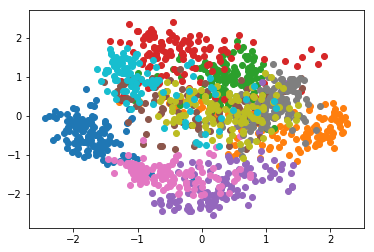

In [238]:
for i in np.unique(y):
    plt.scatter(mf.u[y_train==i][:, 0], mf.u[y_train==i][:, 1])
plt.show()

In [239]:
model = LogisticRegression(solver='liblinear')
model.fit(x_train, y_train)
print(accuracy_score(y_test, model.predict(x_test)))

transformed_train = mf.transform(x_train)
transformed_test = mf.transform(x_test)
model.fit(transformed_train, y_train)

print(accuracy_score(y_test, model.predict(transformed_test)))

0.9595959595959596
0.5791245791245792


In [240]:
x_train.shape, transformed_train.shape

((1203, 64), (1203, 2))